# Titanic ML Starter Problem

This notebook is an elegant (hopefully) walkthrough of how to approach the classic Titanic problem as a first time ML project using Scikit-learn.

This is not intended to give the absolute best results or by any means fully explore the endless possibilities that can be shown with this dataset. But instead to be a reference for anyone to follow along with and eventually build upon!

## Initial Model

First we will inspect the data...

In [3]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

train_data = pd.read_csv("./Titanic_Kaggle_comp/titanic/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Now we will make a copy of the training data so that we can make changes without altering the main data. We can then create several copies which have been altered in different ways and then compare the scores.

As a first attempt, we will drop all the columns which contain string data and just fit a first model on the nice and easy numerical data.

In [5]:
train_data_1 = train_data.copy()

# print(len(train_data_1.Ticket.unique()))
train_data_1 = train_data_1.drop(["Ticket", "Embarked", "Name", "Cabin", "Sex"], axis=1)

In [6]:
# train_data_1["Cabin"] = train_data_1["Cabin"].fillna("None")
train_data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
dtypes: float64(2), int64(5)
memory usage: 48.9 KB


Next we shall drop any rows of values that contain any NaN values. These are contained in the Age column which is a pretty important column here. Potentially it would be better to replace these unavailable ages with the median age, but then this might skew the data in the wrong direction! For now, we will ignore the NaN values.

In [7]:
train_data_1 = train_data_1.dropna(axis=0)

Now we can inspect what we have left and plot some histograms to see the different dependencies of features. This might give us some clues as to what sort of transformations we may want to do.

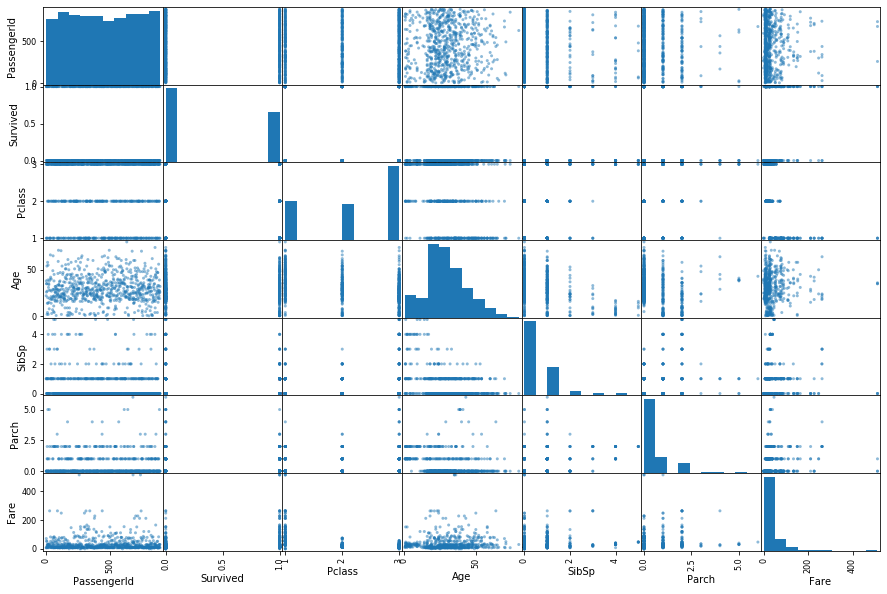

In [8]:
from pandas.plotting import scatter_matrix

scatter_matrix(train_data_1, figsize=(15,10))
plt.show()

Before we do anything more, we will run our first model to try to get a baseline score to build on. Here we'll split the training data into a training set and a validation set so that we can evaluate how well our model generalises.

In [9]:
from sklearn.model_selection import train_test_split

X_train_full = train_data_1.drop("Survived", axis=1)
y_train_full = train_data_1["Survived"]

X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full)

In [10]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier()

forest.fit(X_train, y_train)

/Users/jamie/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [17]:
print(f"Training Accuracy - {forest.score(X_train, y_train)*100:.2f}%")
print(f"Validation Accuracy - {forest.score(X_val, y_val)*100:.2f}%")

Training Accuracy - 97.76%
Validation Accuracy - 69.27%


## Back to the data...

We can see from the data that we actually have a passenger ID which tells us nothing about chances of survival and is actually just an index parameter, so lets sort that out...

In [18]:
train_data_2 = train_data.copy()
train_data_2 = train_data_2.drop(["PassengerId"], axis=1)
train_data_2.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


We can also see that we have some columns which are categorical (such as the Class, Sex). In fact here it may be that the class is being interpreted as a continuous variable which causes even more of a problem. We will therefore use the OneHotEncoder on these features to ensure they are being treated as categorical.

In [19]:
from sklearn.preprocessing import OneHotEncoder

one_hot = OneHotEncoder(categories="auto")

train_data_cat_pclass = train_data_2[["Pclass"]]
train_data_cat_sex = train_data_2[["Sex"]]

train_data_1hot_pclass = one_hot.fit_transform(train_data_cat_pclass)
train_1hot_pclass_df = pd.DataFrame(train_data_1hot_pclass.toarray(), columns=one_hot.get_feature_names(["Class"]))

train_data_1hot_sex = one_hot.fit_transform(train_data_cat_sex)
train_1hot_sex_df = pd.DataFrame(train_data_1hot_sex.toarray(), columns=one_hot.get_feature_names(["Sex"]))
train_1hot_pclass_df.head()

,Class_1,Class_2,Class_3
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,1.0,0.0,0.0
4,0.0,0.0,1.0


And then the gender category...

In [20]:
train_1hot_sex_df.head()

,Sex_female,Sex_male
0,0.0,1.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,0.0,1.0


We now need to replace the original "Sex" and "Pclass" columns with these new categorical columns. We do this using .join() and .drop(). Note that also in this step we have dropped the "Ticket" column as we can see that this has very limited information and is usually specific to an individual or a very small group which means when we split the data, a random forest will not know how to deal with this sort of data.

In [21]:
train_data_2["Ticket"].value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
347088      6
           ..
335677      1
349248      1
350029      1
334912      1
335097      1
Name: Ticket, Length: 681, dtype: int64

In [22]:
train_data_2 = train_data_2.join(train_1hot_pclass_df)
train_data_2 = train_data_2.join(train_1hot_sex_df)

train_data_2 = train_data_2.drop(["Sex", "Pclass", "Ticket"], axis=1)

train_data_2.head()

,Survived,Name,Age,SibSp,Parch,Fare,Cabin,Embarked,Class_1,Class_2,Class_3,Sex_female,Sex_male
0,0,"Braund, Mr. Owen Harris",22.0,1,0,7.2500,NaN,S,0.0,0.0,1.0,0.0,1.0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,71.2833,C85,C,1.0,0.0,0.0,1.0,0.0
2,1,"Heikkinen, Miss. Laina",26.0,0,0,7.9250,NaN,S,0.0,0.0,1.0,1.0,0.0
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,53.1000,C123,S,1.0,0.0,0.0,1.0,0.0
4,0,"Allen, Mr. William Henry",35.0,0,0,8.0500,NaN,S,0.0,0.0,1.0,0.0,1.0


We now turn to the "Name" column. Obviously the names are different for each individual here and so these are not something we can feasibly use. However every name is accompanied with a title! Which is something we can attempt to use. Lets isolate these titles and replace the "Name" column with a "Title" column.

In [23]:
from sklearn.base import BaseEstimator, TransformerMixin

class AddTitles(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.name = "Name"
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        titles = []
        for i in X[self.name].values:
            last, first = i.split(",")
            title, *name = first.split(".")
            if title not in [" Mr", " Miss", " Mrs", " Master"]:
                titles.append("Other")
            else:
                titles.append(title)
#         original = X.columns
        X = X.assign(Name=titles)
        X.rename(columns={"Name": "Title"}, inplace=True)
        return X

In [24]:
add_title_column = AddTitles()

train_data_2 = add_title_column.fit_transform(train_data_2)

In [25]:
train_data_2.head()

,Survived,Title,Age,SibSp,Parch,Fare,Cabin,Embarked,Class_1,Class_2,Class_3,Sex_female,Sex_male
0,0,Mr,22.0,1,0,7.2500,NaN,S,0.0,0.0,1.0,0.0,1.0
1,1,Mrs,38.0,1,0,71.2833,C85,C,1.0,0.0,0.0,1.0,0.0
2,1,Miss,26.0,0,0,7.9250,NaN,S,0.0,0.0,1.0,1.0,0.0
3,1,Mrs,35.0,1,0,53.1000,C123,S,1.0,0.0,0.0,1.0,0.0
4,0,Mr,35.0,0,0,8.0500,NaN,S,0.0,0.0,1.0,0.0,1.0


Now we have a "Title" column which also looks like it could be interpreted as a categorical feature.

Cleaning this up further, we will also remove the "Cabin" column as this has a lot of missing values and any information we could extract from it would most likely be correlated with the class feature.

In [26]:
train_data_2 = train_data_2.drop(["Cabin"], axis=1)

train_data_2.head()

,Survived,Title,Age,SibSp,Parch,Fare,Embarked,Class_1,Class_2,Class_3,Sex_female,Sex_male
0,0,Mr,22.0,1,0,7.2500,S,0.0,0.0,1.0,0.0,1.0
1,1,Mrs,38.0,1,0,71.2833,C,1.0,0.0,0.0,1.0,0.0
2,1,Miss,26.0,0,0,7.9250,S,0.0,0.0,1.0,1.0,0.0
3,1,Mrs,35.0,1,0,53.1000,S,1.0,0.0,0.0,1.0,0.0
4,0,Mr,35.0,0,0,8.0500,S,0.0,0.0,1.0,0.0,1.0


Although the Embarked column may not have any obvious connection to whether or not people survived or not, we will keep it in this analysis. For all we know there could have been a lifeboat that was only letting on people that boarded at Southampton. Or that more of the wealthy people that were a priority to save were actually from Queenstown...

We also noticed that there are a couple of missing values in this column so we must also deal with this. We will construct an imputer to fill in the missing values with the most frequent values in the corpus. As this is the most likely place that these people would have boarded.

In [27]:
class MostFrequentImputer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.col = "Embarked"
        
    def fit(self, X, y=None):
        self.most_frequent = X[self.col].value_counts().index[0]
        return self
    
    def transform(self, X, y=None):
        X[self.col] = X[self.col].fillna(self.most_frequent)
        return X

In [28]:
most_freq = MostFrequentImputer()

train_data_2 = most_freq.fit_transform(train_data_2)
train_data_2.head()

,Survived,Title,Age,SibSp,Parch,Fare,Embarked,Class_1,Class_2,Class_3,Sex_female,Sex_male
0,0,Mr,22.0,1,0,7.2500,S,0.0,0.0,1.0,0.0,1.0
1,1,Mrs,38.0,1,0,71.2833,C,1.0,0.0,0.0,1.0,0.0
2,1,Miss,26.0,0,0,7.9250,S,0.0,0.0,1.0,1.0,0.0
3,1,Mrs,35.0,1,0,53.1000,S,1.0,0.0,0.0,1.0,0.0
4,0,Mr,35.0,0,0,8.0500,S,0.0,0.0,1.0,0.0,1.0


In [29]:
train_data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
Survived      891 non-null int64
Title         891 non-null object
Age           714 non-null float64
SibSp         891 non-null int64
Parch         891 non-null int64
Fare          891 non-null float64
Embarked      891 non-null object
Class_1       891 non-null float64
Class_2       891 non-null float64
Class_3       891 non-null float64
Sex_female    891 non-null float64
Sex_male      891 non-null float64
dtypes: float64(7), int64(3), object(2)
memory usage: 83.7+ KB


While we're sorting out missing values, we can also attempt to fill in the missing ages. Obviously, this is more complicated as if we went for a median value for example we may be misclassifying a baby girl as a middle aged woman for example. To make our imputer more accurate, we will group each person by their title which we found earlier. Then we will fill in the missing values with the median age found in each "Title" group.

In [32]:
class MedianImputer_age(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.groupby_col = "Title"
        self.fill_col = "Age"
        self.median_val = []
        
    def fit(self, X, y=None):
        self.median_val = X[[self.groupby_col, self.fill_col]].groupby([self.groupby_col]).median()
        return self
    
    def transform(self, X, y=None):
        for index, i in self.median_val.iterrows():
            X[X[self.groupby_col] == index] = X[X[self.groupby_col] == index].fillna({self.fill_col: i[0]})
        return X

In [33]:
median_imputer = MedianImputer_age()

train_data_2 = median_imputer.fit_transform(train_data_2)
train_data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
Survived      891 non-null int64
Title         891 non-null object
Age           891 non-null float64
SibSp         891 non-null int64
Parch         891 non-null int64
Fare          891 non-null float64
Embarked      891 non-null object
Class_1       891 non-null float64
Class_2       891 non-null float64
Class_3       891 non-null float64
Sex_female    891 non-null float64
Sex_male      891 non-null float64
dtypes: float64(7), int64(3), object(2)
memory usage: 83.7+ KB


Now we are ready to do some more one-hot encoding to make sure our algorithm treats these features as categorical variables. We will do this here for the "Embarked" and "Title" columns.

In [34]:
one_hot = OneHotEncoder()

train_data_cat_embarked = train_data_2[["Embarked"]]
train_data_cat_title = train_data_2[["Title"]]

train_data_1hot_embarked = one_hot.fit_transform(train_data_cat_embarked)
train_1hot_embarked_df = pd.DataFrame(train_data_1hot_embarked.toarray(), columns=one_hot.get_feature_names(["Embarked"]))

train_data_1hot_title = one_hot.fit_transform(train_data_cat_title)
train_1hot_title_df = pd.DataFrame(train_data_1hot_title.toarray(), columns=one_hot.get_feature_names(["Title"]))

train_data_2 = train_data_2.join(train_1hot_embarked_df)
train_data_2 = train_data_2.join(train_1hot_title_df)

train_data_2 = train_data_2.drop(["Embarked", "Title"], axis=1)

train_data_2.head()

,Survived,Age,SibSp,Parch,Fare,Class_1,Class_2,Class_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_ Master,Title_ Miss,Title_ Mr,Title_ Mrs,Title_Other
0,0,22.0,1,0,7.2500,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,1,38.0,1,0,71.2833,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,26.0,0,0,7.9250,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,1,35.0,1,0,53.1000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0,35.0,0,0,8.0500,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [35]:
train_data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 18 columns):
Survived         891 non-null int64
Age              891 non-null float64
SibSp            891 non-null int64
Parch            891 non-null int64
Fare             891 non-null float64
Class_1          891 non-null float64
Class_2          891 non-null float64
Class_3          891 non-null float64
Sex_female       891 non-null float64
Sex_male         891 non-null float64
Embarked_C       891 non-null float64
Embarked_Q       891 non-null float64
Embarked_S       891 non-null float64
Title_ Master    891 non-null float64
Title_ Miss      891 non-null float64
Title_ Mr        891 non-null float64
Title_ Mrs       891 non-null float64
Title_Other      891 non-null float64
dtypes: float64(15), int64(3)
memory usage: 125.4 KB


Above we have also printed a list of the columns, all showing that they are appropriately filled in with no missing values. We have not yet considered the "Parch" and "SibSp" columns though! These could potentially be combined into one feature "Family". The reson for this is that they are both sort of correlated as they are both counts of family members, and ombining them would reduce the number of features further. It also would give us a more reliable count because at the moment a value of 2 in "Parch" could mean 2 children, 2 parents or 1 child and 1 parent, whereas in "Family" 2 means this person has 2 family members on board.

In [36]:
class AddFamily(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X["Family"] = X["Parch"] + X["SibSp"]
        X = X.drop(["Parch", "SibSp"], axis=1)
        return X

add_fam = AddFamily()

train_data_2_fam = add_fam.fit_transform(train_data_2)

train_data_2_fam.head()

,Survived,Age,Fare,Class_1,Class_2,Class_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_ Master,Title_ Miss,Title_ Mr,Title_ Mrs,Title_Other,Family
0,0,22.0,7.2500,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1
1,1,38.0,71.2833,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
2,1,26.0,7.9250,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0
3,1,35.0,53.1000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1
4,0,35.0,8.0500,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0


We now analyse the unique values of the new "Family" column. We can see here that past 3 family members, the sample sizes of people with 3+ are begining to thin out. To account for this and reduce the number of categories here, we will replace all those with 4 or more family members with the variable 3, to represent 3+.

In [37]:
train_data_2_fam["Family"].value_counts()

0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: Family, dtype: int64

Here is the new count, under the new categories!

In [38]:
class AddFamily(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        X["Family"] = X["Parch"] + X["SibSp"]
        X = X.drop(["Parch", "SibSp"], axis=1)
        X["Family"] = X["Family"].replace([4, 5, 6, 7, 10], 3)
        return X

add_fam = AddFamily()

train_data_2 = add_fam.fit_transform(train_data_2)

train_data_2["Family"].value_counts()

0    537
1    161
2    102
3     91
Name: Family, dtype: int64

Once again, as these are categorical variables we use our one hot encoder!

In [39]:
one_hot = OneHotEncoder(categories="auto")

train_data_cat_fam = train_data_2[["Family"]]

train_data_1hot_fam = one_hot.fit_transform(train_data_cat_fam)
train_1hot_fam_df = pd.DataFrame(train_data_1hot_fam.toarray(), columns=one_hot.get_feature_names(["Family"]))

train_data_2 = train_data_2.join(train_1hot_fam_df)
train_data_2 = train_data_2.drop(["Family"], axis=1)

The data now looks like this, and we are almost finished!

In [40]:
train_data_2.head()

,Survived,Age,Fare,Class_1,Class_2,Class_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_ Master,Title_ Miss,Title_ Mr,Title_ Mrs,Title_Other,Family_0,Family_1,Family_2,Family_3
0,0,22.0,7.2500,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1,38.0,71.2833,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,1,26.0,7.9250,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1,35.0,53.1000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0,35.0,8.0500,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


Now there are a couple of things we can do here as a last step with our numerical data. A lot of ML algorithms don't like numerical data that isn't scaled and so one of the things we could do here is to use a StandardScaler() function to scale our "Age" and "Fare" columns. Before we do this though we must split our data into training and validation as scaling using the validation means that we will have corrupted the integrity of the validation data.

In [41]:
y_train_full = train_data_2["Survived"].astype("int64")
train_data_2_full = train_data_2.drop(["Survived"], axis=1)

X_train_2, X_val_2, y_train_2, y_val_2 = train_test_split(train_data_2_full, y_train_full, random_state=42)

In [42]:
from sklearn.preprocessing import StandardScaler

num_attribs = ["Age", "Fare"]

std_scaler = StandardScaler()

X_scaled = std_scaler.fit_transform(X_train_2[num_attribs])

X_train_2_scaled = X_train_2.assign(Age=X_scaled[:,0],
                            Fare=X_scaled[:,1])

X_val_scaled = std_scaler.transform(X_val_2[num_attribs])

X_val_2_scaled = X_val_2.assign(Age=X_val_scaled[:,0],
                        Fare=X_val_scaled[:,1])

X_train_2_scaled.head()

,Age,Fare,Class_1,Class_2,Class_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_ Master,Title_ Miss,Title_ Mr,Title_ Mrs,Title_Other,Family_0,Family_1,Family_2,Family_3
298,0.060352,-0.032568,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
884,-0.318078,-0.487331,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
247,-0.393763,-0.342854,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
478,-0.545135,-0.478201,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
305,-2.140592,2.314937,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


Above we show the newly scaled numerical data in our dataframe. We are now ready to see how this representation of the data is recieved by our RandomForest that we used earlier...

In [43]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(random_state=42)

forest.fit(X_train_2_scaled, y_train_2)

/Users/jamie/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [45]:
print(f"Training Accuracy - {forest.score(X_train_2_scaled, y_train_2)*100:.2f}%")
print(f"Validation Accuracy - {forest.score(X_val_2_scaled, y_val_2)*100:.2f}%")

Training Accuracy - 96.86%
Validation Accuracy - 80.27%


Great! We have increased our validation accuracy which is a general estimate of the generalisation error which we would get if we used our test set. (Remember we are not touching the test set until right at the end, after we have performed our hyperparameter selection).

Now, we said there was a couple of ways we could treat those numerical columns and here is the second: We could turn our age column into a categorical valued feature. This does make sense as if you were on a sinking ship deciding who should get a place on a lifeboat, you're probably not asking for peoples ID... it is much more likely that you are making an estimate of peoples age based on their appearance. So in this next step we construct replace our "Age" column with categorical age brackets.

In [46]:
class AgeBracket(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        for index, age in X["Age"].items():
            if 0 <= age <= 5:
                X.loc[index, "Age"] = "0-5"
            elif 5 < age <= 10:
                X.loc[index, "Age"] = "5-10"
            elif 10 < age <=15:
                X.loc[index, "Age"] = "10-15"
            elif 15 < age <=20:
                X.loc[index, "Age"] = "15-20"
            elif 20 < age <= 30:
                X.loc[index, "Age"] = "20-30"
            elif 30 < age <= 40:
                X.loc[index, "Age"] = "30-40"
            elif 40 < age <= 60:
                X.loc[index, "Age"] = "40-60"
            else:
                X.loc[index, "Age"] = "60+"
        return X

age_bracket = AgeBracket()

train_data_2 = age_bracket.fit_transform(train_data_2)

train_data_2["Age"].value_counts()

20-30    385
30-40    172
40-60    129
15-20     96
0-5       48
60+       22
5-10      20
10-15     19
Name: Age, dtype: int64

Again, it's one hot time!!

In [47]:
one_hot = OneHotEncoder(categories="auto")

train_data_cat_age = train_data_2[["Age"]]

train_data_1hot_age = one_hot.fit_transform(train_data_cat_age)
train_1hot_age_df = pd.DataFrame(train_data_1hot_age.toarray(), columns=one_hot.get_feature_names(["Age"]))

train_data_2 = train_data_2.join(train_1hot_age_df)
train_data_2 = train_data_2.drop(["Age"], axis=1)

train_data_2.head()

,Survived,Fare,Class_1,Class_2,Class_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,...,Family_2,Family_3,Age_0-5,Age_10-15,Age_15-20,Age_20-30,Age_30-40,Age_40-60,Age_5-10,Age_60+
0,0,7.2500,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1,71.2833,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1,7.9250,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1,53.1000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0,8.0500,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


Now there is no need to scale our remaining numerical data as it is only one column, so doesn't matter to the ML algorithm.

In [48]:
y_train_full = train_data_2["Survived"].astype("int64")
train_data_2_full = train_data_2.drop(["Survived"], axis=1)

X_train_2, X_val_2, y_train_2, y_val_2 = train_test_split(train_data_2_full, y_train_full, random_state=42)

In [49]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(random_state=42)

forest.fit(X_train_2, y_train_2)

/Users/jamie/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [50]:
print(f"Training Accuracy - {forest.score(X_train_2, y_train_2)*100:.2f}%")
print(f"Validation Accuracy - {forest.score(X_val_2, y_val_2)*100:.2f}%")

Training Accuracy - 94.31%
Validation Accuracy - 81.17%


So we got an extra 1%, just by using age brackets!

Now we want to automate as much of this preprocessing as possible to make our ML algorithm as simple and easy to use/fix as possible. We will put all of the classes we constructed together into a Pipeline function.

In [52]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

num_attribs = ["Fare"]
cat_attribs = ["Sex", "Pclass", "Name", "Embarked", "Age", "Parch", "SibSp"]

cat_pipeline = Pipeline([
    ('add_titles', AddTitles()),
    ('freq_imputer', MostFrequentImputer()),
    ('med_imputer', MedianImputer_age()),
    ('add_fam', AddFamily()),
    ('age_bras', AgeBracket()),
    ('one_hot', OneHotEncoder()),
])

full_pipeline = ColumnTransformer([
    ("num", StandardScaler(), num_attribs),
    ("cat", cat_pipeline, cat_attribs),
])

train_data_3 = train_data.copy()

X_train_full = train_data_3.drop("Survived", axis=1)
y_train_full = train_data_3["Survived"]

X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, random_state=42)

X_train_prepared = full_pipeline.fit_transform(X_train)
X_val_prepared = full_pipeline.transform(X_val)

In [53]:
forest = RandomForestClassifier(random_state=42)

forest.fit(X_train_prepared, y_train)

/Users/jamie/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [54]:
print(f"Training Accuracy - {forest.score(X_train_prepared, y_train)}%")
print(f"Validation Accuracy - {forest.score(X_val_prepared, y_val)}%")

Training Accuracy - 0.9401197604790419%
Validation Accuracy - 0.8340807174887892%


We have now automated this preprocessing process and can now move on to the hyperparameter searching!

## Hyper parameter searching

Now we can perform some hyperparameter searching. First we want to search a wider area and so we will use a randomised search across a wide range of parameters to see which area to home in onto.

In [55]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'bootstrap': [True, False],
    'max_depth': [None, 30, 40],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [1, 2],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [10, 20, 100]
}

r_forest = RandomForestClassifier(random_state=42)

rand_search = RandomizedSearchCV(estimator=r_forest, n_iter=40, cv=3, param_distributions=param_grid)

X_train_full_prepared = full_pipeline.fit_transform(X_train_full)

rand_search.fit(X_train_full_prepared, y_train_full)

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [56]:
rand_search.best_params_

{'n_estimators': 100,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 30,
 'bootstrap': True}

In [57]:
rand_search.best_score_

0.8260381593714927

So the best parameters turned out to be pretty similar to the default ones, which is why our score didn't change that much here. We will now perform a grid search around these parameters to see if we can improve this score any further.

In [58]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'bootstrap': [True, False],
    'max_depth': [None],
    'max_features': ['auto'],
    'min_samples_leaf': [6, 8, 10],
    'min_samples_split': [2, 5, 6, 7, 10],
    'n_estimators': [10, 20, 50, 100]
}

grid_search = GridSearchCV(estimator=r_forest, cv=3, param_grid=param_grid)

grid_search.fit(X_train_full_prepared, y_train_full)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=42,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'

In [59]:
grid_search.best_params_

{'bootstrap': False,
 'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 6,
 'min_samples_split': 2,
 'n_estimators': 100}

In [60]:
grid_search.best_score_

0.8237934904601572

So we have found the best parameters around this parameter space and can see that the score has increased slightly. Now we will need to see what happens when we look at our test data.

In [61]:
X_test_full = pd.read_csv("./Titanic_Kaggle_comp/titanic/test.csv")
y_test = pd.read_csv("./Titanic_Kaggle_comp/titanic/gender_submission.csv")

In [62]:
y_test_full = y_test["Survived"]

X_test_full.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [63]:
X_test_full_prepared = full_pipeline.fit_transform(X_test_full)
X_test_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


So here we actually have found something that we didn't account for in our training set because we didn't need to. Our test set has missing values for the Fare! In a more thorough analysis of this dataset we would anticipate this problem and build a pipeline that could account for missing values in any of the features that we need, which is something to bear in mind for future projects.

We will quickly amend this problem by filling in all missing Fare values using the median fare for the class that the passenger is in.

In [64]:
class MedianImputer_Fare(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.groupby_col = "Pclass"
        self.fill_col = "Fare"
        self.median_val = []
        
    def fit(self, X, y=None):
        self.median_val = X[[self.groupby_col, self.fill_col]].groupby([self.groupby_col]).median()
        return self
    
    def transform(self, X, y=None):
        for index, i in self.median_val.iterrows():
            X[X[self.groupby_col] == index] = X[X[self.groupby_col] == index].fillna({self.fill_col: i[0]})
        return X

    
med_imp = MedianImputer_Fare()

X_test_test = med_imp.fit_transform(X_test_full)
X_test_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           418 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


Also seeing as the Pclass column is not part of the num_pipeline, we will create a class to remove this column after we have used it to fill in missing values for the Fare column.

Again, thinking about this further, it may be better to define a separate pipeline to fill in any missing values before we separate into numerical and categorical pipelines.

In [65]:
class DropCol(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.col_ = "Pclass"
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        return X.drop([self.col_], axis=1)

In [70]:
num_attribs = ["Fare", "Pclass"]
cat_attribs = ["Sex", "Pclass", "Name", "Embarked", "Age", "Parch", "SibSp"]

cat_pipeline = Pipeline([
    ('add_titles', AddTitles()),
    ('freq_imputer', MostFrequentImputer()),
    ('med_imputer', MedianImputer_age()),
    ('add_fam', AddFamily()),
    ('age_bras', AgeBracket()),
    ('one_hot', OneHotEncoder()),
])

num_pipeline = Pipeline([
    ('med_imputer', MedianImputer_Fare()),
    ('drop_class', DropCol()),
    ('scaler', StandardScaler()),
])

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs),
])

X_train_full_prepared = full_pipeline.fit_transform(X_train_full)

X_test_full_prepared = full_pipeline.transform(X_test_full)

In [73]:
rf_best = RandomForestClassifier(bootstrap=False, max_depth=None,
                                max_features='auto', min_samples_leaf=8,
                                min_samples_split=2, n_estimators=20, random_state=42)

rf_best.fit(X_train_full_prepared, y_train_full)
print("Results:")
print(f"Training acuuracy: {rf_best.score(X_train_full_prepared, y_train_full)*100:.2f}%")
print(f"Test accuracy: {rf_best.score(X_test_full_prepared, y_test_full)*100:.2f}%")

Results:
Training acuuracy: 85.75%
Test accuracy: 91.63%


Interestingly, the classifier was more accurate on the test set! This is still explainable as the data in the test set could have been a lot easier to classify. For example if there was a lot of little girls from first class with their mothers and old men from third class then the classifier may be more accurate at classifying these than some of the harder to classify ones in the training set.